**Hello Hibatallah!**

My name is Alexey Kargin, and I will review your current project. Nice to meet you! I have added all my comments on your new project to cells with different coloring. Please, do not move or delete them - it helps us move faster:

<div class="alert alert-success">
<b>Reviewer's comment v.1</b> 
    
I am using green color for my comment if everything is done successfully.
</div>

<div class="alert alert-warning">
<b>Reviewer's comment v.1</b> 
    
I will use yellow color for my comment if I can give you a recommendation or think that something can be improved. These are optional recommendations, but it will be perfect if you work with them in this or future projects.
</div>

<div class="alert alert-danger">
<b>Reviewer's comment v.1</b> 
    
I am using red color for my comment if the block requires some extra work or corrections. The project couldn’t be accepted with red comments.
</div>
  
To make a dialog, let’s use this style for your remarks:
<div class="alert alert-info"> 
<b>Student's comment</b> 
    
Just like this. To make a similar block - double click on the block, copy and edit it in places you are changing.
</div>

Now, let’s go to data analysis!

---
    
<div class="alert alert-success">
<b>General feedback v.1</b>
    
Hibatallah, thank you for sending your project 👋 
    
You have made a lot of correct steps! This part of the sprint is quite simple, so we should pay more attention to the project's description, presentation of the results, and recommendations for a business. <span class="text-danger"> So I would suggest that there are minor issues. You can find them in the red boxes. </span> I believe you can easily fix it!
    
   
Keep up the good work, and come back soon! 
    
<br>
Best regards,
<br> Alexey
</div>

---

<div class="alert alert-success">
<b>General feedback v.2</b>
    
Hibatallah, thanks for your quick fixes! Now your project is a true "A". Congratulations! I'm glad to say that your project has been accepted. Keep up the good work, and good luck on the next sprint!
    
Bests, Alex
</div>


<hr class="my-12" style = "border: 1px solid #3c763d"/>

# STEP 1 Exploratory data analysis (Python)

You now have these two CSVs:

`/datasets/project_sql_result_01.csv`

It contains the following data:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.

`/datasets/project_sql_result_04.csv`

It contains the following data:
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

For these two datasets you now need to:

1. import the files
2. study the data they contain
3. make sure the data types are correct
4. identify the top 10 neighborhoods in terms of drop-offs
5. make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
6. draw conclusions based on each graph and explain the results

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ Good start with the brief introduction and description of the data! We could also add the table of content within the Introduction part.

</div>

In [1]:
!pip install squarify
import squarify
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Defaulting to user installation because normal site-packages is not writeable


<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ It's a good practice to make all imports in 1st cell! Thank you for taking care of upgrading libraries.
</div>

In [2]:
def get_precent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls
        

def get_info(df,num):
    print('Head:')
    print()
    display(df.head())
    print ('-'*100)
    print('Info:')
    print()
    display(df.info())
    print ('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print ('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_precent_of_na_df(df,num))
    print ('-'*100)
    print('Shape:')
    print(df.shape)
    print ('-'*100)
    print('Duplicated:')
    print('We have {} duplicated rows!'.format(df.duplicated().sum()))

In [3]:
company_name_trips_amount = pd.read_csv('/datasets/project_sql_result_01.csv')

dropoff_location_average_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

In [4]:
get_info(company_name_trips_amount, 4)

Head:



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


----------------------------------------------------------------------------------------------------


,company_name
count,64
unique,64
top,2809 - 95474 C & D Cab Co Inc.
freq,1



Columns with nulls:


,Missing Values,Percent of Nulls
company_name,0,0.0
trips_amount,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(64, 2)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


- The `company_name_trips_amount` table contains the 
    - `company_name` and
    - `trips_amount`: which is the number of rides for each taxi company on November 15-16, 2017. 
- It has 64 rows of taxi companies.

In [5]:
get_info(dropoff_location_average_trips, 4)

Head:



,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


----------------------------------------------------------------------------------------------------


,dropoff_location_name
count,94
unique,94
top,Chicago Lawn
freq,1



Columns with nulls:


,Missing Values,Percent of Nulls
dropoff_location_name,0,0.0
average_trips,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(94, 2)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


We see that the data looks fine

- The `dropoff_location_average_trips` table contains 
    - `dropoff_location_name`, names of the Chicago neighborhoods where dropoffs occured
    - `average_trips`, the average number of rides that ended in each of these Chicago neighborhoods in November 2017.

In [6]:
# Remove unneccessary numbers and - from the name
company_name_trips_amount['company_name'] = company_name_trips_amount['company_name'].str.replace('\d+ - (\d+)* -*', '')
company_name_trips_amount['company_name'] = company_name_trips_amount['company_name'].str.replace('\d+ - ', '')

- We are ready to slice the data now

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
✔  The data are well loaded and observed.
</div>

**identify the top 10 neighborhoods in terms of drop-offs**

- Let's first sort the average trips and pick the 10 highest locations.

In [7]:
top_10_dropoffs = dropoff_location_average_trips.sort_values("average_trips",ascending=False).head(10)
top_10_dropoffs

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


- And now sort the most trips and pick the 10 highest companies.

In [8]:
#top_10_companies = company_name_trips_amount.sort_values('trips_amount',ascending=False).head(10)

In [9]:
top_10_companies = company_name_trips_amount.nlargest(10, 'trips_amount')
top_10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
⭐Good job at this stage! The data have been prepared to the study. It is good that you have done sorted the data and selected the first 10 entries before plotting the graphs. 

In this case, we could also use the `.nlargest()` method. This method returns the first `n` rows ordered by columns in descending order and is equivalent to `df.sort_values(columns, ascending=False).head(n)`, but more performant.
    
</div>

<div class="alert alert-info"> 
<b>Student's comment</b> 
    
Done, thank you
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
✔ Well done!
</div>

- Making a barplot of the companies with the most number of trips made

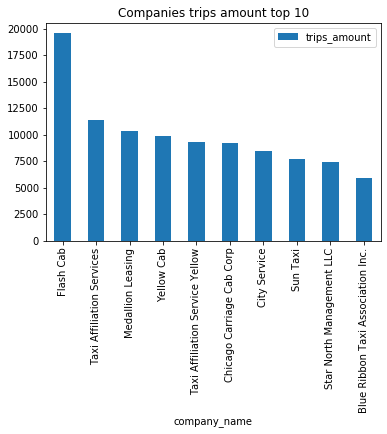

In [10]:
top_10_companies.plot(kind='bar', y= "trips_amount", x ="company_name", title='Companies trips amount top 10')
plt.show()

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1</b> 
    
📊 We should pay more attention to the graph within projects. Please add the graph title and the Y-axis label. Also, we could avoid the technical information display like that `<matplotlib.axes._subplots.AxesSubplot at 0x7fe359a47150>` using the `plt.show()` method.
    
Please check and fix that as well as check the other plots within the project.
</div>


<div class="alert alert-info"> 
<b>Student's comment</b> 
    
Done
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
✔ Thanks!
</div>

- We can see here that for November 15-16, 2017:
    - `Flash Cab` has the highest market share, almost 20% 
    - `Blue Ribbon Taxi Association Inc.` Taxi has the 10th highest with 6% of the market share.

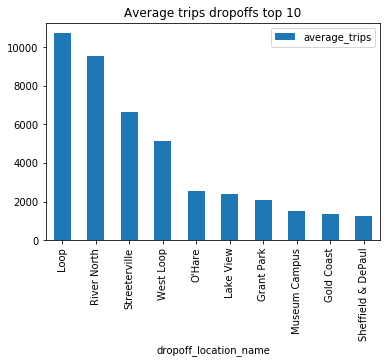

In [11]:
top_10_dropoffs.plot(kind='bar', y= "average_trips", x ="dropoff_location_name", title='Average trips dropoffs top 10')
plt.show()

- We can see here too which neighborhoods had the most number of average trips that ended there in November 2017. 
    - `Loop` is the highest with almost 25%

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ Well done! The top-10 drop-off locations have been observed and described. 
    
---    
    
🌎 Also, we could expand the conclusions with additional information. We could find on the Internet that the first four top neighborhoods (Loop, River North, Streeterville, West Loop) are located close to each other, and they are the most popular places in Chicago. It explains the high amount of average trips for them and most probably between them. http://www.thechicago77.com/chicago-neighborhoods/
    
</div>

# STEP 2  Testing hypotheses (Python)

- Let's import the last dataset for the hypothesis test

In [12]:
loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

In [13]:
get_info(loop_ohare, 4)

Head:



,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


----------------------------------------------------------------------------------------------------


,start_ts,weather_conditions
count,1068,1068
unique,81,2
top,2017-11-11 10:00:00,Good
freq,48,888



Columns with nulls:


,Missing Values,Percent of Nulls
start_ts,0,0.0
weather_conditions,0,0.0
duration_seconds,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(1068, 3)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 197 duplicated rows!


- converting the start_ts column to datetime format first so it makes the filtering easier for us

In [14]:
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'])

- As we see here, we have 197 duplicates, let's take a closer look

In [15]:
loop_ohare.duplicated().sum()

197

In [16]:
loop_ohare[loop_ohare.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [17]:
#droping duplicates
loop_ohare = loop_ohare.drop_duplicates().reset_index(drop=True)
loop_ohare.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
✔ Well, the duplicates have been recognized and dropped. We could also see that the `start_ts` data were rounded up to an hour, and the `duration_seconds` data were rounded up to tens. So, in this case, we do not know whether it is duplicate data or identity.
    
</div>

- let's take a closer look at `duration_seconds` column

In [18]:
loop_ohare['duration_seconds'].min()

0.0

- the `duration_seconds` can't be 0
- I think the best is to drop the 0 records

In [19]:
loop_ohare.drop(loop_ohare[loop_ohare['duration_seconds'] == 0].index, inplace = True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
✔ Correct!
    
</div>

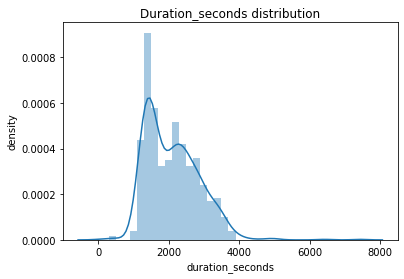

In [20]:
sns.distplot(loop_ohare["duration_seconds"], bins=list(range(100, 4000, 200))).set(title='Duration_seconds distribution', xlabel='duration_seconds', ylabel='density')
plt.show()

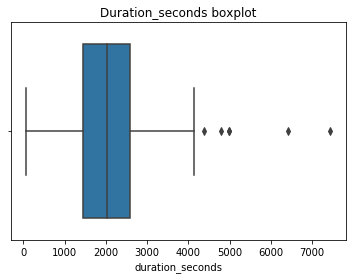

In [21]:
sns.boxplot(loop_ohare["duration_seconds"]).set(title='Duration_seconds boxplot', xlabel='duration_seconds')
plt.show()

In [22]:
loop_ohare['duration_seconds'].max()

7440.0

In [23]:
loop_ohare['duration_seconds'].median()

2037.0

In [24]:
loop_ohare.loc[((loop_ohare['duration_seconds'] > 2037) & (loop_ohare['duration_seconds'] <= 7440.0) )].shape

(432, 3)

In [25]:
loop_ohare[loop_ohare['duration_seconds']==7440.0]

,start_ts,weather_conditions,duration_seconds
325,2017-11-25 11:00:00,Good,7440.0


**Conclusion**
- Our data had no missing values
- We dropped the duplicates and also the `duration_seconds` = 0 records
- From the 2 previous plots, we can conlude that 
    - the distribution of the `duration_seconds` is slightly skewd right
    - but converging to a normal distribution

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ It is good that you have been prepared the data for the following study.
    
</div>

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1</b> 
    
✍ However, I would suggest some additional jobs here. Before providing the test, we should study the data that we used:
- check the data for duplicates;
- revise the data on any mistakes (i.e. zero durations).

💹 At the end of this step, we should present brief conclusions regarding the source data. Please note that the result of the t-test depends on the presence of outliers in the data. So we should check that.

Also, please display the values that we compared. It makes results more informative we will know how the duration be changed.
    
Please check and fix that.
</div>


<div class="alert alert-info"> 
<b>Student's comment</b> 
    
- done</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
✔ Thank you for your additional job at this stage.
    
</div>

**Test the hypothesis:**

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Decide where to set the significance level (alpha) on your own.


- Let's choose standard the significance level 0.05 and let's state:

$H_0$ = "The average duration of rides from the Loop to O'Hare International Airport doesn't change"

$H_1$ = "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

we will test by average value and after that also check both average values

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
👍  Well done! The hypotheses have been formulated correctly.
    
</div>

In [26]:
alpha = 0.05

In [27]:
H0 = "The average duration of rides from the Loop to O'Hare International Airport doesn't change"
H1 = "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [28]:
saturdays_bad_rides = loop_ohare[(loop_ohare["start_ts"].dt.weekday==5)&(loop_ohare["weather_conditions"]!="Good")]["duration_seconds"].values

In [29]:
saturdays_good_rides = loop_ohare[(loop_ohare["start_ts"].dt.weekday==5)&(loop_ohare["weather_conditions"]=="Good")]["duration_seconds"].values

In [30]:
len(saturdays_bad_rides), len(saturdays_good_rides)

(148, 717)

In [31]:
result = stats.ttest_ind(saturdays_bad_rides, saturdays_good_rides)
print('pvalue:', result.pvalue)

avg_rainy_durations_min = (saturdays_bad_rides.mean()/60).round(decimals=2)
avg_nrainy_durations_min = (saturdays_good_rides.mean()/60).round(decimals=2)

if (result.pvalue < alpha):
    print(H1)
else:
    print(H0)
print("checking:")
print(f"bad weather, mean={saturdays_bad_rides.mean():.2f}")
print('The average duration of rainy Saturday rides is: ' + str(avg_rainy_durations_min) + " minutes")
print(f"good weather, mean={saturdays_good_rides.mean():.2f}")
print('The average duration of non-rainy Saturday rides is: ' + str(avg_nrainy_durations_min) + " minutes")

pvalue: 1.5394237752380357e-07
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
checking:
bad weather, mean=2409.23
The average duration of rainy Saturday rides is: 40.15 minutes
good weather, mean=2049.26
The average duration of non-rainy Saturday rides is: 34.15 minutes


<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
👍 If we consider the test part, you have done a perfect job: the hypotheses have been formulated, the code and the interpretations of the results are correct.
    
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v.1:</b> 
    
Please note that before testing statistical hypotheses using the Student's t-test, it is important to understand whether our data adhere to the assumptions that this statistical test makes for our compared samples. One of them is to check the homogeneity of the variances of the two compared samples. This is necessary in order to understand with which parameter to use the test method (Student's t-test or Welch's t-test) and specify the equal_var argument inside the st.ttest_ind method. You can read more in the scipy documentation: 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
    

</div>

- We want to test the hypothesis that the average duration of rides rom the Loop to O'Hare International Airport changes on rainy Saturdays. 
- The data files we imported gives us the following informations for Saturdays in November of 2017:
    - `start_ts` : pickup date and time
    - `weather_conditions` : weather conditions at the moment the ride started
    - `duration_seconds` : ride duration in seconds
- We tested the hypothesis using t-test, from the groups (`Good` and `Bad` weather), to compare the average duration of the ride in seconds.
- Using an independent samples, the Central Limit Theorem implies that the means of a statistical population are approximately normally distributed, so we can estimate the mean  using the mean of the sample, i.e. use t-test.
- We rejected the null hypothesis with a significance level of 0.05. This means that the average duration of rides from the Loop to O'Hare Airport differs on rainy Saturdays from non-rainy Satudays. 
- Thus, by looking at the numbers, the average duration of rainy Saturday rides is 40.15 minutes, while the average duration of non-rainy Saturday rides is 34.15 minutes. With a difference of 6 minutes between rainy and sunny Saturdays, we conclude that the weather impacts on the flight durations.

# Overall Conclusion



- In the first part of this project we imported the two first files and found that the data are fine, no need to preprocess.
- In order to slice the data, we've identified the top 10 neighborhoods in terms of drop-offs, by sorting the average trips and picking the 10 highest locations, then sorting the most trips and picking the 10 highest companies. 
- Then making a barplot of each of the data slices.
- In the second part of the project we've imported the third data file, and found 197 duplicates, we dropped. and since the `duration_seconds` can't be 0, We dropped the 0 rows.
- We went with the null hypothesis that 'The average duration of rides from the Loop to O'Hare International Airport does not change' and the alternative hypothesis that 'The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.' and with a significance level of 0.05, we were able to confidently reject the null hypothesis.

<div class="alert alert-info"> 
<b>Student's comment</b> 
    
- done</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v.2</b>
    
Hibatallah, you have made a lot of correct steps! Your code sometimes looks professional. I like your conclusions and their details! By the way, to be an analyst, we have to make data-based conclusions. Some of them - are a description of data and our findings, others - about technical problems with data, but the most important ones - insights useful for business. It is complicated and interesting. Try to give more  some improvements for business in the following projects.


</div>

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1</b> 
    
✍ However, I would suggest some additional jobs here: 
1. please explain what criterion you used to test the hypotheses and why;
2. please provide overall conclusions and recommendations for the business. 

</div>